<a href="https://colab.research.google.com/github/Alvaro-Garcia-Parra/AA_GRUPO3/blob/main/LAB03_Pr1Olimpiadas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
# Importación de librerías a utilizar
import mlxtend
from mlxtend.frequent_patterns import association_rules, apriori
from mlxtend import frequent_patterns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
# Lectura de la base de datos
filename = 'olimpiadas.csv'
data = pd.read_csv(filename, sep = ',')

# Revisión de los datos
print(data.dtypes)
data

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [31]:
# Creamos el nuevo dataset con las variables necesarias
data = data[['Sex','Age','Height','Weight','Games','Sport','Medal']]
data.drop_duplicates()
data

,Sex,Age,Height,Weight,Games,Sport,Medal
0,M,24.0,180.0,80.0,1992 Summer,Basketball,NaN
1,M,23.0,170.0,60.0,2012 Summer,Judo,NaN
2,M,24.0,NaN,NaN,1920 Summer,Football,NaN
3,M,34.0,NaN,NaN,1900 Summer,Tug-Of-War,Gold
4,F,21.0,185.0,82.0,1988 Winter,Speed Skating,NaN
...,...,...,...,...,...,...,...
271111,M,29.0,179.0,89.0,1976 Winter,Luge,NaN
271112,M,27.0,176.0,59.0,2014 Winter,Ski Jumping,NaN
271113,M,27.0,176.0,59.0,2014 Winter,Ski Jumping,NaN
271114,M,30.0,185.0,96.0,1998 Winter,Bobsleigh,NaN


In [32]:
data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Sex     271116 non-null  object 
 1   Age     261642 non-null  float64
 2   Height  210945 non-null  float64
 3   Weight  208241 non-null  float64
 4   Games   271116 non-null  object 
 5   Sport   271116 non-null  object 
 6   Medal   39783 non-null   object 
dtypes: float64(3), object(4)
memory usage: 14.5+ MB


<ipython-input-32-c1a516913eb1>:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  data.info(verbose=True, null_counts=True)


In [33]:
data = data.drop(data[np.isnan(data['Age'])].index)
data = data.drop(data[np.isnan(data['Weight'])].index)
data = data.drop(data[np.isnan(data['Height'])].index)
data['Medal'].fillna('None', inplace = True)

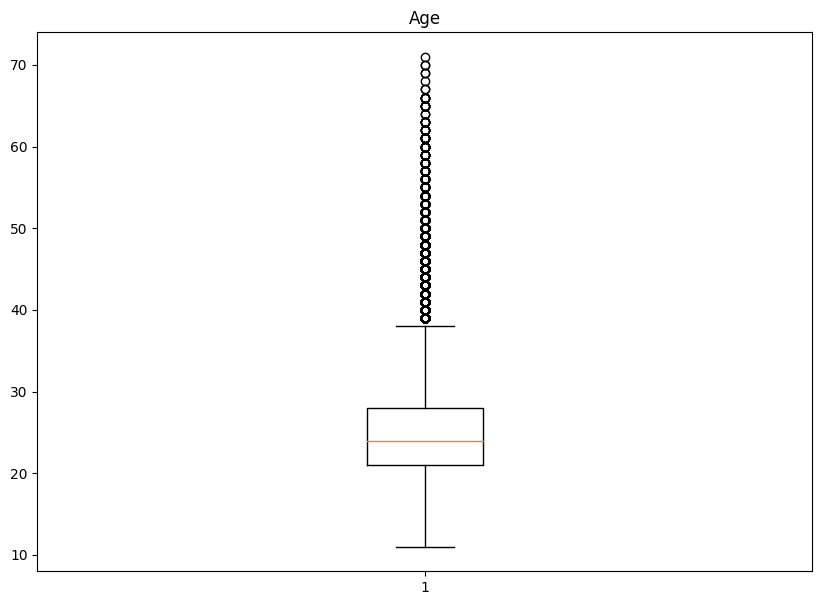

In [34]:
# Vemos los outliers

fig = plt.figure(figsize =(10, 7))

# Crear gráfico
ax = fig.add_subplot(111)
ax.boxplot(data["Age"])
ax.set_title('Age')

# Dibujar gráfico
plt.show()

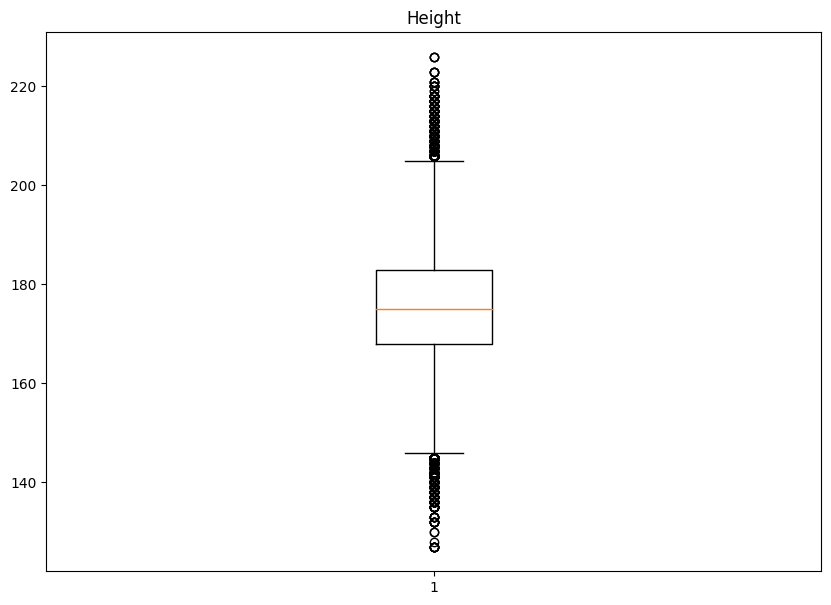

In [35]:
# Vemos los outliers

fig = plt.figure(figsize =(10, 7))

# Crear gráfico
ax = fig.add_subplot(111)
ax.boxplot(data["Height"])
ax.set_title('Height')

# Dibujar gráfico
plt.show()

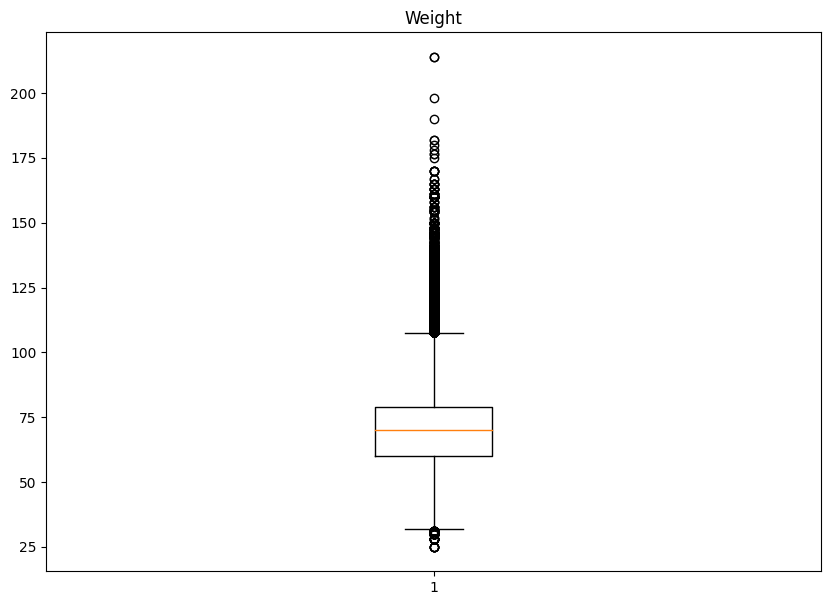

In [36]:
# Vemos los outliers

fig = plt.figure(figsize =(10, 7))

# Crear gráfico
ax = fig.add_subplot(111)
ax.boxplot(data["Weight"])
ax.set_title('Weight')

# Dibujar gráfico
plt.show()

In [37]:
# Antes de nada definimos lo que es la etiqueta (y) y nuestros individuos
data = data.sample(n = 50000)
X = data.drop(['Medal'], axis = 1)
y = data['Medal']

# Añadimos los individuos que queremos clasificar
bruno_hortelano = ['M',31,181,72,'2018 Winter','Athletics']
carolina_marin = ['F',29,172,65,'2020 Summer','Badminton']

# Convertir la lista en un dataframe con un solo renglón
bruno_hortelano = pd.DataFrame([bruno_hortelano], columns=X.columns)
carolina_marin = pd.DataFrame([carolina_marin], columns=X.columns)

# Añadimos los individuos
X = pd.concat([X,bruno_hortelano], ignore_index= True)
X = pd.concat([X,carolina_marin], ignore_index= True)

In [38]:
# Convertir los datos de tipo string a valores numéricos utilizando la codificación one-hot encoding
from sklearn.model_selection import train_test_split

X = pd.get_dummies(X,columns=['Sex','Games','Sport'])
carolina_marin = X.iloc[[-1]].reset_index(drop = True)
bruno_hortelano = X.iloc[[-2]].reset_index(drop = True)

X = X.drop(X.index[[-2,-1]])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from prettytable import PrettyTable

k_range = [3,5,7,9]
distancias = ['euclidean', 'manhattan', 'hamming', 'minkowski']

# Creación de la tabla
tabla = PrettyTable()
tabla.field_names = ["K","Distance","Accuracy"]

# Guardamos en una variable la distancia y el nímero de vecinos más óptimos
best_score = 0
best_metric = ''
best_k = 0

for d in distancias:
  k_scores = []
  index = 0
  for k in k_range:
      knn = KNeighborsClassifier(n_neighbors = k, metric = d)
      scores = cross_val_score(knn, X, y, cv=4, scoring='accuracy')
      k_scores.append(scores.mean())

      if scores.mean() >= best_score:
        best_score = scores.mean()
        best_metric = d
        best_k = k


      tabla.add_row([k,d,round(k_scores[index],4)])
      index = index + 1

  plt.figure()
  plt.title(label = d)
  plt.xlabel('k')
  plt.ylabel('accuracy')
  plt.scatter(k_range, k_scores)
  plt.xticks(range(0,10))

In [ ]:
print(tabla)
print("\nObservando la tabla podemos concluir lo siguiente:\n")
print(f"Utilizaremos la distancia {best_metric} con un número de vecinos (k = {best_k}), cuya precisión máxima es de {best_score}")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Creamos el clasificador
clasificador = KNeighborsClassifier(n_neighbors = best_k, metric = best_metric)
clasificador.fit(X_train, y_train)

# Vemos la precisión de nuestro clasificador con los datos de test
pred = clasificador.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

In [ ]:
# Clasificar nuevos individuos a través de nuestro clasificador
print(clasificador.predict(bruno_hortelano))
print(clasificador.predict(carolina_marin))